# Descenso de gradiente: Ejercicio 3

## En el blog https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931 se explica conclaridad como usar el descenso de gradiente para un problema simple de regresión lineal. Aplícalo a algún conjunto de datos que quieras en una libreta de Jupyter explicando cada paso de manera cuidadosa.

### Cargamos los paquetes necesarios y definimos el tamaño de los gráficos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

### Cargamos y procesamos los datos provenientes del archivo "DatosE3.csv", a su vez definimos las X, como variable independiente, y Y, como variable dependiente. Por último se ilustran en un gráfico de dispersión.

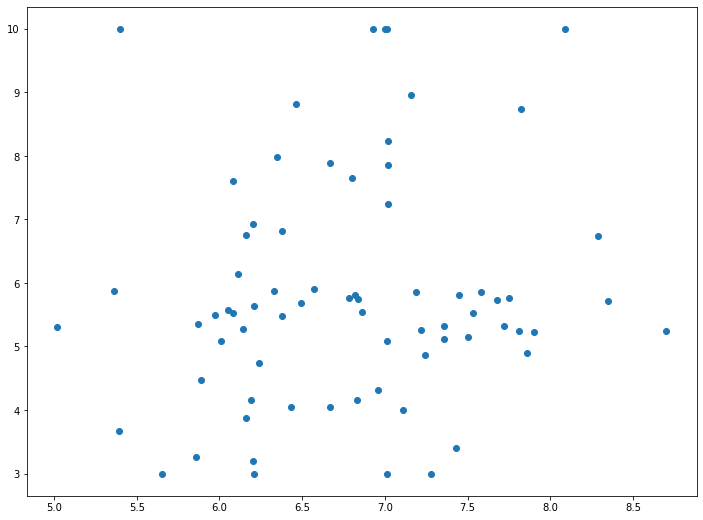

In [2]:
data = pd.read_csv('DatosE3.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

### Se construye el modelo lineal donde "m" es la pendiente de la recta y "c" la constante, o el valor de Y cuando X vale 0. Nuestro modelo trata de obtener los mejores valores de "m" y "c" que resulten en el menor error de nuestros valores de Y estimados respecto a los valores de Y observados.
### Y= mX + c

### Para llegar a los valores de "m" y "c" que mejor se adapten al fenómeno estudiado se elige el método de descenso de gradiente.
### De inicio nuestros valores de "m" y "c" son iguales a 0. 
### Se define "L" como nuestra tasa de aprendizaje, es decir que tanto van variando los valores de m en cada paso, para este ejercicio L= 0.0001 para obtener mayor precisión.
### epoch es el número de iteraciones para llevar a cabo el descenso de grandiente. Para este ejercicio se llevaran a cabo 1000 iteraciones

In [3]:
m = 0
c = 0

L = 0.0001  # Tasa de aprendizaje
epochs = 1000  # Número de iteraciones para llevar a cabo el descenso de gradiente

n = float(len(X)) # Número de valores de X

### Loss  es el error de nuestros valores estimados m y c para obtener Y respecto a los valores observados de Y. Para minimizar este error se obtiene la función del error cuadrático medio.

### Para llevar a cabo el descenso de gradiente se obtienen las derivadas parciales de la función de error cuadrático medio respecto a "m" y respecto a "c", y se actualizan sus valores para la siguiente iteración.

In [4]:
for i in range(epochs): 
    Y_pred = m*X + c  # Valor de Y resultante del modelo
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivada parcial de la función de error cuadrático medio respecto a m
    D_c = (-2/n) * sum(Y - Y_pred)   # Derivada parcial de la función de error cuadrático medio respecto a c
    m = m - L * D_m  # Valor actualizado de m
    c = c - L * D_c  # Valor actualizado de c
    
print (m, c) #Valores óptimos de m y c resultantes del descenso de gradiente

0.8329784315988901 0.13052040388019343


### Con los valores de m y c óptimos en nuestro modelo lineal, obtenemos los valores de Y estimados para cada valor de X

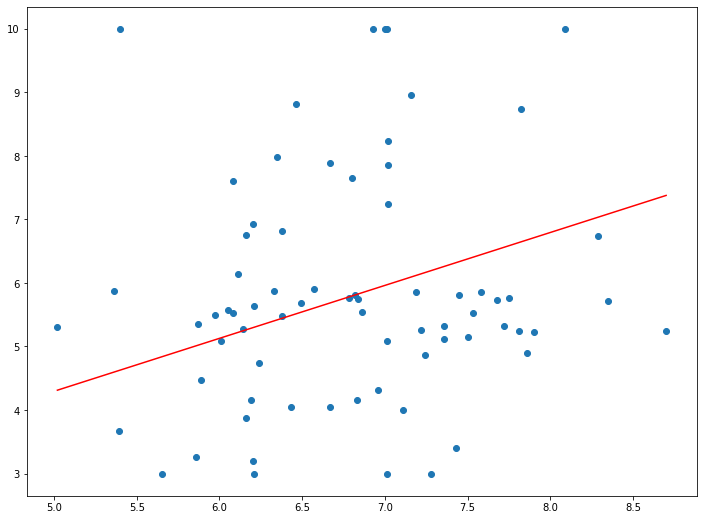

In [5]:
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # Línea de regresión
plt.show()

## Extra: Teóricamente, este problema de regresión lineal se puede resolver usando únicamente álgebra lineal (pero no es muy eficiente computacionalmente). ¿Podrías explicar cómo? Busca por ejemplo cómo se resuelve usando SVD.



### Para resolver este problema con álgebra lineal se pueden obtener la descomposición en valores singulares de nuestra matriz de datos. Truncando las matrices de valores singulares a rangos menores que la matriz original se pueden obtener aproximaciones que sean las que mejor reduzcan el error cuadrático medio, entre más se aproxime el rango solicitado de las matrices de valores singulares a la matriz de datos mayor la presición del cálculo, sin embargo, en matrices de rango muy alto el método podría resultar poco eficiente para obtener aproximaciones precisas, por lo que se puede preferir otros métodos.